In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

In [3]:
!pip install gensim

     |████████████████████████████████| 24.2MB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 133kB 40.8MB/s eta 0:00:01
     |████████████████████████████████| 133kB 46.9MB/s eta 0:00:01
     |████████████████████████████████| 6.7MB 44.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 26.1MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/6a/25/34/a5afefe4e3cad127e65c9bd1b6440c1916feb0bf2f744001e2
Successfully built smart-open


In [4]:
import gensim

In [5]:
import re

# Model / Dictionary loading/preprocessing

In [6]:
model_word2vec = gensim.models.KeyedVectors.load("../../../models_storage/word_embeddings_data/word2vec_phrased_filtered_300d_2020_sept5.bin") 

In [7]:
culture = pd.read_csv("../../Dictionary Mapping/Dictionaries/Cultural_core.csv", sep='\n', header=None)
culture.columns = ["vocab"]
demographic = pd.read_csv("../../Dictionary Mapping/Dictionaries/Demographic_core.csv", sep='\n', header=None)
demographic.columns = ["vocab"]
relational = pd.read_csv("../../Dictionary Mapping/Dictionaries/Relational_core.csv", sep='\n', header=None)
relational.columns = ["vocab"]


In [8]:
culture.vocab = culture.vocab.apply(lambda x: re.sub(',', '_', x))
demographic.vocab = demographic.vocab.apply(lambda x: re.sub(',', '_', x))
relational.vocab = relational.vocab.apply(lambda x: re.sub(',', '_', x))


In [9]:
culture100 = pd.read_csv("../../Dictionary Mapping/Dictionaries/Expanded/wordnet_english2/closest_culture_100.csv", sep='\n', header=None)
culture100.columns = ["vocab"]
demographic100 = pd.read_csv("../../Dictionary Mapping/Dictionaries/Expanded/wordnet_english2/closest_demographic_100.csv", sep='\n', header=None)
demographic100.columns = ["vocab"]
relational100 = pd.read_csv("../../Dictionary Mapping/Dictionaries/Expanded/wordnet_english2/closest_relational_100.csv", sep='\n', header=None)
relational100.columns = ["vocab"]


In [10]:
ls = []
for i in culture.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
culture = culture[ls]
print(sum(ls), ' words preserved')

31  words preserved


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [11]:
ls = []
for i in demographic.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
demographic = demographic[ls]
print(sum(ls), ' words preserved')

21  words preserved


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [12]:
ls = []
for i in relational.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
relational = relational[ls]
print(sum(ls), ' words preserved')

31  words preserved


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [13]:
ls = []
for i in culture100.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
culture100 = culture100[ls]
print(sum(ls), ' words preserved')

ls = []
for i in demographic100.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
demographic100 = demographic100[ls]
print(sum(ls), ' words preserved')

ls = []
for i in relational100.vocab:
    try:
        model_word2vec[i]
        ls.append(True)
    except:
        ls.append(False)
        
relational100 = relational100[ls]
print(sum(ls), ' words preserved')

100  words preserved
100  words preserved
100  words preserved


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [14]:
culture_emb = np.mean(model_word2vec[culture.vocab], axis =0)

demographic_emb = np.mean(model_word2vec[demographic.vocab], axis =0)

relational_emb = np.mean(model_word2vec[relational.vocab], axis =0)

culture_100_emb = np.mean(model_word2vec[culture100.vocab], axis =0)

demographic_100_emb = np.mean(model_word2vec[demographic100.vocab], axis =0)

relational_100_emb = np.mean(model_word2vec[relational100.vocab], axis =0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecate

In [15]:
from numpy import dot, absolute
from numpy.linalg import norm

# Data Validation - Validating Cosine Similarities of dictionaries 

In [16]:
df_emb = pd.DataFrame()

ls_emb = []
ls_emb.append(absolute(dot(culture_emb, culture_emb)/(norm(culture_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(culture_emb, culture_100_emb)/(norm(culture_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(culture_emb, demographic_emb)/(norm(culture_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(culture_emb, demographic_100_emb)/(norm(culture_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(culture_emb, relational_emb)/(norm(culture_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(culture_emb, relational_100_emb)/(norm(culture_emb)*norm(relational_100_emb))))
df_emb['culture core'] = ls_emb

ls_emb = []
ls_emb.append(absolute(dot(culture_100_emb, culture_emb)/(norm(culture_100_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(culture_100_emb, culture_100_emb)/(norm(culture_100_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(culture_100_emb, demographic_emb)/(norm(culture_100_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(culture_100_emb, demographic_100_emb)/(norm(culture_100_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(culture_100_emb, relational_emb)/(norm(culture_100_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(culture_100_emb, relational_100_emb)/(norm(culture_100_emb)*norm(relational_100_emb))))
df_emb['culture 100'] = ls_emb

ls_emb = []
ls_emb.append(absolute(dot(demographic_emb, culture_emb)/(norm(demographic_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(demographic_emb, culture_100_emb)/(norm(demographic_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(demographic_emb, demographic_emb)/(norm(demographic_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(demographic_emb, demographic_100_emb)/(norm(demographic_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(demographic_emb, relational_emb)/(norm(demographic_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(demographic_emb, relational_100_emb)/(norm(demographic_emb)*norm(relational_100_emb))))
df_emb['demographic core'] = ls_emb

ls_emb = []
ls_emb.append(absolute(dot(demographic_100_emb, culture_emb)/(norm(demographic_100_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(demographic_100_emb, culture_100_emb)/(norm(demographic_100_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(demographic_100_emb, demographic_emb)/(norm(demographic_100_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(demographic_100_emb, demographic_100_emb)/(norm(demographic_100_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(demographic_100_emb, relational_emb)/(norm(demographic_100_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(demographic_100_emb, relational_100_emb)/(norm(demographic_100_emb)*norm(relational_100_emb))))
df_emb['demographic 100'] = ls_emb

ls_emb = []
ls_emb.append(absolute(dot(relational_emb, culture_emb)/(norm(relational_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(relational_emb, culture_100_emb)/(norm(relational_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(relational_emb, demographic_emb)/(norm(relational_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(relational_emb, demographic_100_emb)/(norm(relational_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(relational_emb, relational_emb)/(norm(relational_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(relational_emb, relational_100_emb)/(norm(relational_emb)*norm(relational_100_emb))))
df_emb['relational core'] = ls_emb

ls_emb = []
ls_emb.append(absolute(dot(relational_100_emb, culture_emb)/(norm(relational_100_emb)*norm(culture_emb))))
ls_emb.append(absolute(dot(relational_100_emb, culture_100_emb)/(norm(relational_100_emb)*norm(culture_100_emb))))
ls_emb.append(absolute(dot(relational_100_emb, demographic_emb)/(norm(relational_100_emb)*norm(demographic_emb))))
ls_emb.append(absolute(dot(relational_100_emb, demographic_100_emb)/(norm(relational_100_emb)*norm(demographic_100_emb))))
ls_emb.append(absolute(dot(relational_100_emb, relational_emb)/(norm(relational_100_emb)*norm(relational_emb))))
ls_emb.append(absolute(dot(relational_100_emb, relational_100_emb)/(norm(relational_100_emb)*norm(relational_100_emb))))
df_emb['relational 100'] = ls_emb

In [17]:
df_emb.index = ['culture core', 'culture 100', 'demographic core', 'demographic 100', 
                'relational core', 'relational 100']

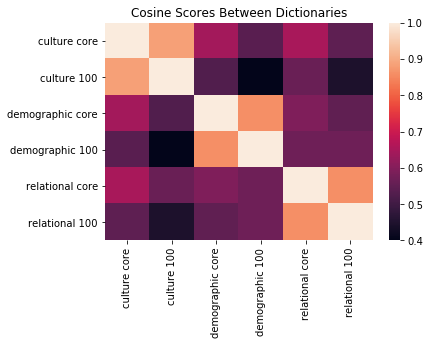

In [18]:
ax = sns.heatmap(df_emb)
ax.set_title('Cosine Scores Between Dictionaries')

fig.set_size_inches(8,8)
title = "cosine_btw_dicts_36v100_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 8), bbox_inches="tight")
plt.show()

# Article data loading / preprocessing

In [19]:
data_path = "../../Dictionary Mapping/counts_and_subject.csv"
df_scores = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_2020_sept10.csv')
df = pd.read_csv(data_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df['edited_filename'] = df['article_id'].apply(lambda x: x[16:])
df.head()

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id,edited_filename
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496,10.2307_2065002
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852,10.2307_3380821
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080,10.2307_2095822
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269,10.2307_2631839
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481,10.2307_40836133


In [21]:
df = pd.merge(df_scores, df, how='left', on='edited_filename')
df.head()

,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id
0,0,0,../../../jstor_data/ocr/journal-article-10.230...,research note church membership netherlands ro...,10.2307_1387034,0.417799,0.457736,0.408485,journal-article-10.2307_1387034,1.0,...,1.0,1.0,1361.0,0.0,0.0,0.0,Sociology,1988,Journal for the Scientific Study of Religion,j100197
1,1,1,../../../jstor_data/ocr/journal-article-10.230...,polish i3o oo sociological review issn communi...,10.2307_41274754,0.519468,0.469725,0.642622,journal-article-10.2307_41274754,0.0,...,1.0,1.0,1238.0,0.0,0.0,0.0,Sociology,2000,Polish Sociological Review,j50003148
2,2,2,../../../jstor_data/ocr/journal-article-10.230...,article jjdlbsj grapliy compassionate egalitar...,10.2307_24467156,0.486376,0.450517,0.668698,journal-article-10.2307_24467156,9.0,...,5.0,4.0,7959.0,0.0,0.0,0.0,Sociology,2014,Ethnography,j50011353
3,3,3,../../../jstor_data/ocr/journal-article-10.230...,reply allison more comparing regression coeffi...,10.2307_2782279,0.437079,0.477599,0.338388,journal-article-10.2307_2782279,25.0,...,7.0,7.0,1979.0,0.0,0.0,0.0,Sociology,1995,American Journal of Sociology,j100067
4,4,4,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,10.2307_351656,0.508613,0.446174,0.494511,journal-article-10.2307_351656,26.0,...,10.0,5.0,4340.0,0.0,0.0,0.0,Sociology,1983,Journal of Marriage and Family,j100234


In [22]:
df['culture_ratio'] = df['culture_ngram_count']/df['word_count']
df['demographic_ratio'] = df['demographic_ngram_count']/df['word_count']
df['relational_ratio'] = df['relational_ngram_count']/df['word_count']

df['culture_word2vec'] = df['culture_word2vec_cosine'] #/df['word_count']
df['demographic_word2vec'] = df['demographic_word2vec_cosine'] #/df['word_count']
df['relational_word2vec'] = df['relational_word2vec_cosine'] #/df['word_count']

In [23]:
#normalization
df['culture_ratio'] = (df['culture_ratio'] - df['culture_ratio'].min())/(df['culture_ratio'].max() - df['culture_ratio'].min())
df['demographic_ratio'] = (df['demographic_ratio'] - df['demographic_ratio'].min())/(df['demographic_ratio'].max() - df['demographic_ratio'].min())
df['relational_ratio'] = (df['relational_ratio'] - df['relational_ratio'].min())/(df['relational_ratio'].max() - df['relational_ratio'].min())


# Correlations for ratios

In [24]:
df['culture_ratio'].corr(df['demographic_ratio'])

0.19414169400589681

In [25]:
df['culture_ratio'].corr(df['relational_ratio'])

0.1314371768312164

In [26]:
df['demographic_ratio'].corr(df['relational_ratio'])

0.08793571741137671

# Score calculation for journals

In [27]:
vocab_100_list = list(culture100.vocab) + list(demographic100.vocab) + list(relational100.vocab)

In [28]:
def vocab_check(x):
    ls = [y for y in x.split() if y in vocab_100_list]
    if len(ls) > 0:
        return(True)
    else:
        return(False)

In [29]:
df.vocab_bool = df.text.apply(lambda x: vocab_check(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [30]:
#excluding cases where theres no vocab involved at all
df_new = df[df.vocab_bool]

In [31]:
df_new = df_new[df_new.year.isnull() == False]

In [32]:
def split_join(x):
    obj = x.split()
    ls = [x for x in obj if x in vocab_100_list]
    return(' '.join(ls))

In [33]:
df_new.text_vocab = df_new.text.apply(lambda x: split_join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [34]:
text_ls = df_new.text_vocab.str.split()

In [35]:
culture_score = []
for i in text_ls:
    text_emb = model_word2vec[i].mean(axis=0)
    culture_score.append(absolute(dot(culture_100_emb, text_emb)/(norm(culture_100_emb)*norm(text_emb))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
demographic_score = []
for i in text_ls:
    text_emb = model_word2vec[i].mean(axis=0)
    demographic_score.append(absolute(dot(demographic_100_emb, text_emb)/(norm(demographic_100_emb)*norm(text_emb))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
relational_score = []
for i in text_ls:
    text_emb = model_word2vec[i].mean(axis=0)
    relational_score.append(absolute(dot(relational_100_emb, text_emb)/(norm(relational_100_emb)*norm(text_emb))))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df_new['culture_score'] = culture_score

df_new['demographic_score'] = demographic_score

df_new['relational_score'] = relational_score

In [39]:
df_new

,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,journal_id,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score
0,0,0,../../../jstor_data/ocr/journal-article-10.230...,research note church membership netherlands ro...,10.2307_1387034,0.417799,0.457736,0.408485,journal-article-10.2307_1387034,1.0,...,j100197,0.006796,0.009552,0.007073,0.408485,0.457736,0.417799,0.547579,0.339277,0.313665
1,1,1,../../../jstor_data/ocr/journal-article-10.230...,polish i3o oo sociological review issn communi...,10.2307_41274754,0.519468,0.469725,0.642622,journal-article-10.2307_41274754,0.0,...,j50003148,0.000000,0.010501,0.038879,0.642622,0.469725,0.519468,0.613183,0.407138,0.619514
2,2,2,../../../jstor_data/ocr/journal-article-10.230...,article jjdlbsj grapliy compassionate egalitar...,10.2307_24467156,0.486376,0.450517,0.668698,journal-article-10.2307_24467156,9.0,...,j50011353,0.010460,0.008167,0.055637,0.668698,0.450517,0.486376,0.824868,0.441111,0.502461
3,3,3,../../../jstor_data/ocr/journal-article-10.230...,reply allison more comparing regression coeffi...,10.2307_2782279,0.437079,0.477599,0.338388,journal-article-10.2307_2782279,25.0,...,j100067,0.116852,0.045983,0.000000,0.338388,0.477599,0.437079,0.316958,0.510942,0.300628
4,4,4,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,10.2307_351656,0.508613,0.446174,0.494511,journal-article-10.2307_351656,26.0,...,j100234,0.055415,0.029954,0.031053,0.494511,0.446174,0.508613,0.539652,0.349638,0.614336
5,5,5,../../../jstor_data/ocr/journal-article-10.230...,wsê ih ompany profile a3 john porter musée du ...,10.2307_41064725,0.495532,0.484790,0.555360,journal-article-10.2307_41064725,3.0,...,j50001051,0.005003,0.014062,0.095448,0.555360,0.484790,0.495532,0.581984,0.634259,0.831390
6,6,6,../../../jstor_data/ocr/journal-article-10.230...,andrew christensen university california los a...,10.2307_4122891,0.537507,0.469701,0.543456,journal-article-10.2307_4122891,10.0,...,j100234,0.011759,0.023138,0.030595,0.543456,0.469701,0.537507,0.531289,0.406798,0.682264
7,7,7,../../../jstor_data/ocr/journal-article-10.230...,two comments reorientation niche theory human ...,10.2307_1389028,0.537278,0.590620,0.659183,journal-article-10.2307_1389028,1.0,...,j100723,0.009556,0.819215,0.019889,0.659183,0.590620,0.537278,0.383071,0.787955,0.450873
8,8,8,../../../jstor_data/ocr/journal-article-10.230...,lawyers consumer protection laws stewart macau...,10.2307_3053111,0.506668,0.459776,0.632547,journal-article-10.2307_3053111,88.0,...,j100264,0.045612,0.022582,0.070124,0.632547,0.459776,0.506668,0.809901,0.415645,0.532258
9,9,9,../../../jstor_data/ocr/journal-article-10.230...,establishing sense personal control transition...,10.2307_3005887,0.488710,0.447946,0.543931,journal-article-10.2307_3005887,27.0,...,j100364,0.031638,0.008234,0.364617,0.543931,0.447946,0.488710,0.300807,0.235359,0.391793


# Data Vis

In [40]:
def year_change(x):
    try:
        return(int(x))
    except:
        return(int(x[:4]))

In [41]:
df_new['year_transform'] = df_new.year.apply(lambda x: year_change(x))

In [42]:
df = df_new

In [43]:
df_avg_sociology = df[df['primary_subject'] == 'Sociology'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology = df_avg_sociology.reset_index()

In [44]:
df_avg_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management = df_avg_management.reset_index()

In [45]:
df_avg_sociology = df_avg_sociology[['culture_score',
                                                          'demographic_score',
                                                          'relational_score','year_transform']]
df_avg_sociology['percentile'] = '50th'

df_avg_management = df_avg_management[['culture_score',
                                                          'demographic_score',
                                                          'relational_score', 'year_transform']]
df_avg_management['percentile'] = '50th'

In [46]:
df_25_sociology = df[df['primary_subject'] == 'Sociology'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology = df_25_sociology.reset_index()

df_75_sociology = df[df['primary_subject'] == 'Sociology'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology = df_75_sociology.reset_index()



df_25_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.25)
df_25_management = df_25_management.reset_index()

df_75_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['culture_score',
                                                          'demographic_score',
                                                          'relational_score',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management = df_75_management.reset_index()

In [47]:
df_25_sociology['percentile'] = '25th'
df_25_management['percentile'] = '25th'

df_75_sociology['percentile'] = '75th'
df_75_management['percentile'] = '75th'


In [48]:
df_sociology = pd.concat([df_25_sociology, df_avg_sociology, df_75_sociology])
df_management = pd.concat([df_25_management, df_avg_management, df_75_management])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Plots

In [49]:
df_sociology

,culture_score,demographic_score,percentile,relational_score,year_transform
0,0.441885,0.385096,25th,0.433039,1971
1,0.462106,0.373636,25th,0.426706,1972
2,0.447779,0.377462,25th,0.436828,1973
3,0.439980,0.381541,25th,0.445090,1974
4,0.438123,0.383016,25th,0.441132,1975
5,0.450694,0.391586,25th,0.448239,1976
6,0.441270,0.378824,25th,0.445009,1977
7,0.446435,0.383909,25th,0.451693,1978
8,0.441341,0.377587,25th,0.452728,1979
9,0.417756,0.381217,25th,0.452522,1980


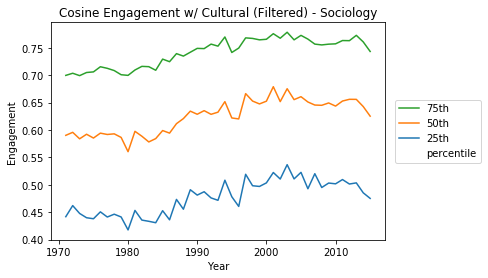

In [50]:
ax = sns.lineplot(x="year_transform", y="culture_score", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Cultural (Filtered) - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

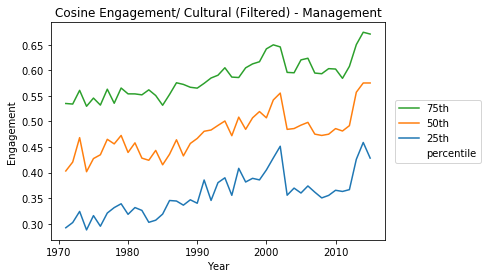

In [51]:
ax = sns.lineplot(x="year_transform", y="culture_score", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement/ Cultural (Filtered) - Management')
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_mgmt_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

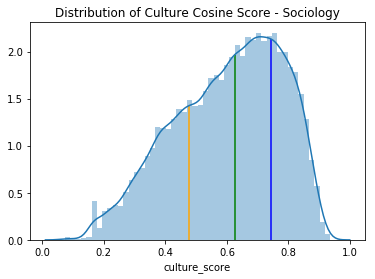

Skew of Distribution
-0.4184792386782279


In [52]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["culture_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))

ax.set_title('Distribution of Culture Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["culture_score"].skew())

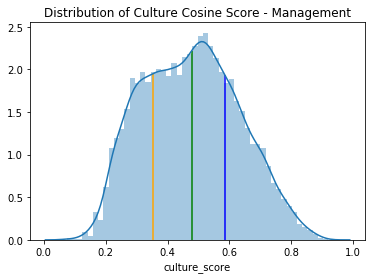

Skew of Distribution
0.15007863206005395


In [53]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Culture Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_score"].skew())

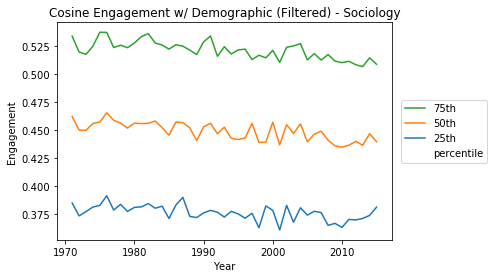

In [54]:
ax = sns.lineplot(x="year_transform", y="demographic_score", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic (Filtered) - Sociology')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

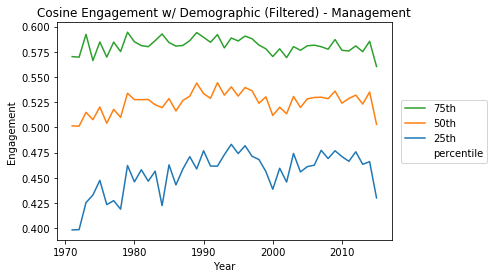

In [55]:
ax = sns.lineplot(x="year_transform", y="demographic_score", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic (Filtered) - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_mgmt_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

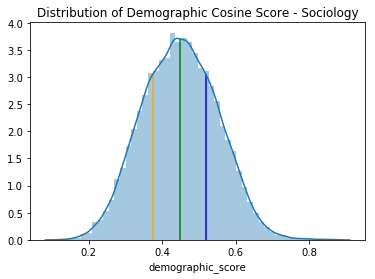

Skew of Distribution
0.07806948975100185


In [56]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["demographic_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["demographic_score"].skew())

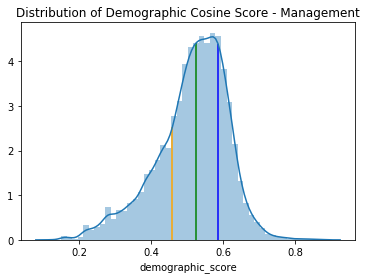

Skew of Distribution
-0.6634324342958033


In [57]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_score"].skew())

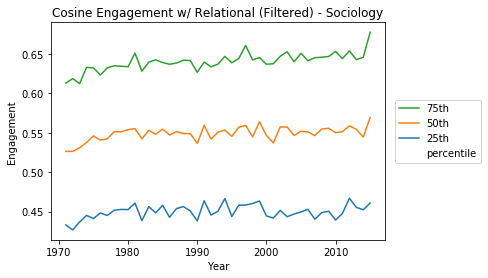

In [58]:
ax = sns.lineplot(x="year_transform", y="relational_score", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational (Filtered) - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

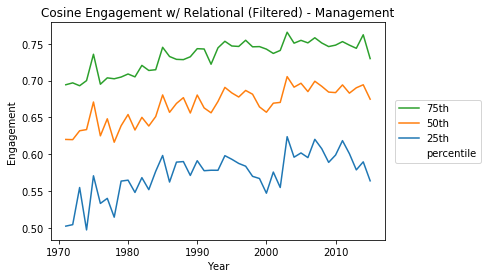

In [59]:
ax = sns.lineplot(x="year_transform", y="relational_score", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational (Filtered) - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_mgmt_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

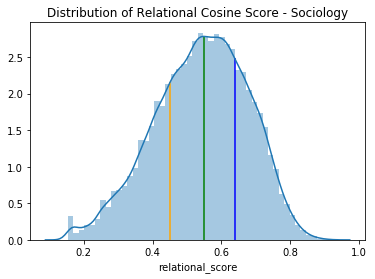

Skew of Distribution
-0.28940401624166834


In [60]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["relational_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["relational_score"].skew())

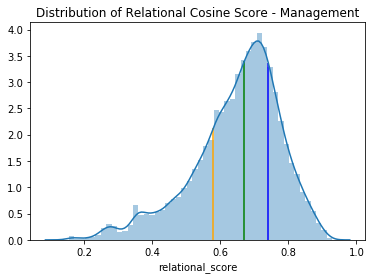

Skew of Distribution
-0.8271002885098941


In [61]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_score"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
# ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_score"].skew())

# Creating Viz with outlier removal procedure (2sd or less in difference)

In [86]:
sd_soc_culture = df[df['primary_subject'] == 'Sociology']['culture_score'].std()
mean_soc_culture = df[df['primary_subject'] == 'Sociology']['culture_score'].mean()
df_sociology_culture_nooutlier = df[df['primary_subject'] == 'Sociology'][(abs(df[df['primary_subject'] == 'Sociology']['culture_score'] - mean_soc_culture) <= sd_soc_culture * 2)]
df_sociology_culture_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
0,0,0,../../../jstor_data/ocr/journal-article-10.230...,research note church membership netherlands ro...,10.2307_1387034,0.417799,0.457736,0.408485,journal-article-10.2307_1387034,1.0,...,0.006796,0.009552,0.007073,0.408485,0.457736,0.417799,0.547579,0.339277,0.313665,1988
1,1,1,../../../jstor_data/ocr/journal-article-10.230...,polish i3o oo sociological review issn communi...,10.2307_41274754,0.519468,0.469725,0.642622,journal-article-10.2307_41274754,0.0,...,0.000000,0.010501,0.038879,0.642622,0.469725,0.519468,0.613183,0.407138,0.619514,2000
2,2,2,../../../jstor_data/ocr/journal-article-10.230...,article jjdlbsj grapliy compassionate egalitar...,10.2307_24467156,0.486376,0.450517,0.668698,journal-article-10.2307_24467156,9.0,...,0.010460,0.008167,0.055637,0.668698,0.450517,0.486376,0.824868,0.441111,0.502461,2014
3,3,3,../../../jstor_data/ocr/journal-article-10.230...,reply allison more comparing regression coeffi...,10.2307_2782279,0.437079,0.477599,0.338388,journal-article-10.2307_2782279,25.0,...,0.116852,0.045983,0.000000,0.338388,0.477599,0.437079,0.316958,0.510942,0.300628,1995
4,4,4,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,10.2307_351656,0.508613,0.446174,0.494511,journal-article-10.2307_351656,26.0,...,0.055415,0.029954,0.031053,0.494511,0.446174,0.508613,0.539652,0.349638,0.614336,1983


In [87]:
sd_soc_demographic = df[df['primary_subject'] == 'Sociology']['demographic_score'].std()
mean_soc_demographic = df[df['primary_subject'] == 'Sociology']['demographic_score'].mean()
df_sociology_demographic_nooutlier = df[df['primary_subject'] == 'Sociology'][(abs(df[df['primary_subject'] == 'Sociology']['demographic_score'] - mean_soc_demographic) <= sd_soc_demographic * 2)]
df_sociology_demographic_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
0,0,0,../../../jstor_data/ocr/journal-article-10.230...,research note church membership netherlands ro...,10.2307_1387034,0.417799,0.457736,0.408485,journal-article-10.2307_1387034,1.0,...,0.006796,0.009552,0.007073,0.408485,0.457736,0.417799,0.547579,0.339277,0.313665,1988
1,1,1,../../../jstor_data/ocr/journal-article-10.230...,polish i3o oo sociological review issn communi...,10.2307_41274754,0.519468,0.469725,0.642622,journal-article-10.2307_41274754,0.0,...,0.000000,0.010501,0.038879,0.642622,0.469725,0.519468,0.613183,0.407138,0.619514,2000
2,2,2,../../../jstor_data/ocr/journal-article-10.230...,article jjdlbsj grapliy compassionate egalitar...,10.2307_24467156,0.486376,0.450517,0.668698,journal-article-10.2307_24467156,9.0,...,0.010460,0.008167,0.055637,0.668698,0.450517,0.486376,0.824868,0.441111,0.502461,2014
3,3,3,../../../jstor_data/ocr/journal-article-10.230...,reply allison more comparing regression coeffi...,10.2307_2782279,0.437079,0.477599,0.338388,journal-article-10.2307_2782279,25.0,...,0.116852,0.045983,0.000000,0.338388,0.477599,0.437079,0.316958,0.510942,0.300628,1995
4,4,4,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,10.2307_351656,0.508613,0.446174,0.494511,journal-article-10.2307_351656,26.0,...,0.055415,0.029954,0.031053,0.494511,0.446174,0.508613,0.539652,0.349638,0.614336,1983


In [89]:
sd_soc_relational = df[df['primary_subject'] == 'Sociology']['relational_score'].std()
mean_soc_relational = df[df['primary_subject'] == 'Sociology']['relational_score'].mean()
df_sociology_relational_nooutlier = df[df['primary_subject'] == 'Sociology'][(abs(df[df['primary_subject'] == 'Sociology']['relational_score'] - mean_soc_relational) <= sd_soc_relational * 2)]
df_sociology_relational_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
0,0,0,../../../jstor_data/ocr/journal-article-10.230...,research note church membership netherlands ro...,10.2307_1387034,0.417799,0.457736,0.408485,journal-article-10.2307_1387034,1.0,...,0.006796,0.009552,0.007073,0.408485,0.457736,0.417799,0.547579,0.339277,0.313665,1988
1,1,1,../../../jstor_data/ocr/journal-article-10.230...,polish i3o oo sociological review issn communi...,10.2307_41274754,0.519468,0.469725,0.642622,journal-article-10.2307_41274754,0.0,...,0.000000,0.010501,0.038879,0.642622,0.469725,0.519468,0.613183,0.407138,0.619514,2000
2,2,2,../../../jstor_data/ocr/journal-article-10.230...,article jjdlbsj grapliy compassionate egalitar...,10.2307_24467156,0.486376,0.450517,0.668698,journal-article-10.2307_24467156,9.0,...,0.010460,0.008167,0.055637,0.668698,0.450517,0.486376,0.824868,0.441111,0.502461,2014
3,3,3,../../../jstor_data/ocr/journal-article-10.230...,reply allison more comparing regression coeffi...,10.2307_2782279,0.437079,0.477599,0.338388,journal-article-10.2307_2782279,25.0,...,0.116852,0.045983,0.000000,0.338388,0.477599,0.437079,0.316958,0.510942,0.300628,1995
4,4,4,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,10.2307_351656,0.508613,0.446174,0.494511,journal-article-10.2307_351656,26.0,...,0.055415,0.029954,0.031053,0.494511,0.446174,0.508613,0.539652,0.349638,0.614336,1983


In [82]:
sd_man_culture = df[df['primary_subject'] == 'Management & Organizational Behavior']['culture_score'].std()
mean_man_culture = df[df['primary_subject'] == 'Management & Organizational Behavior']['culture_score'].mean()
df_management_culture_nooutlier = df[df['primary_subject'] == 'Management & Organizational Behavior'][(abs(df[df['primary_subject'] == 'Management & Organizational Behavior']['culture_score'] - mean_man_culture) <= sd_man_culture * 2)]
df_management_culture_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
5,5,5,../../../jstor_data/ocr/journal-article-10.230...,wsê ih ompany profile a3 john porter musée du ...,10.2307_41064725,0.495532,0.484790,0.555360,journal-article-10.2307_41064725,3.0,...,0.005003,0.014062,0.095448,0.555360,0.484790,0.495532,0.581984,0.634259,0.831390,2001
11,11,11,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xi number spring...,10.2307_40604253,0.615350,0.532279,0.606348,journal-article-10.2307_40604253,32.0,...,0.045984,0.018176,0.421724,0.606348,0.532279,0.615350,0.536969,0.582039,0.590051,1999
12,12,12,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xvi number sprin...,10.2307_40601181,0.618027,0.532132,0.576713,journal-article-10.2307_40601181,4.0,...,0.007225,0.033001,0.090230,0.576713,0.532132,0.618027,0.525169,0.658543,0.756466,2004
20,20,20,../../../jstor_data/ocr/journal-article-10.230...,journal organizational behavior vol research u...,10.2307_2488524,0.473229,0.454759,0.488540,journal-article-10.2307_2488524,4.0,...,0.005447,0.019137,0.049599,0.488540,0.454759,0.473229,0.452779,0.641916,0.561584,1988
21,21,21,../../../jstor_data/ocr/journal-article-10.230...,managerial decision economics vol interim audi...,10.2307_2487182,0.577143,0.508635,0.491301,journal-article-10.2307_2487182,14.0,...,0.035962,0.036101,0.042772,0.491301,0.508635,0.577143,0.353884,0.462391,0.809250,1982


In [83]:
sd_man_demographic = df[df['primary_subject'] == 'Management & Organizational Behavior']['demographic_score'].std()
mean_man_demographic = df[df['primary_subject'] == 'Management & Organizational Behavior']['demographic_score'].mean()
df_management_demographic_nooutlier = df[df['primary_subject'] == 'Management & Organizational Behavior'][(abs(df[df['primary_subject'] == 'Management & Organizational Behavior']['demographic_score'] - mean_man_demographic) <= sd_man_demographic * 2)]
df_management_demographic_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
5,5,5,../../../jstor_data/ocr/journal-article-10.230...,wsê ih ompany profile a3 john porter musée du ...,10.2307_41064725,0.495532,0.484790,0.555360,journal-article-10.2307_41064725,3.0,...,0.005003,0.014062,0.095448,0.555360,0.484790,0.495532,0.581984,0.634259,0.831390,2001
11,11,11,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xi number spring...,10.2307_40604253,0.615350,0.532279,0.606348,journal-article-10.2307_40604253,32.0,...,0.045984,0.018176,0.421724,0.606348,0.532279,0.615350,0.536969,0.582039,0.590051,1999
12,12,12,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xvi number sprin...,10.2307_40601181,0.618027,0.532132,0.576713,journal-article-10.2307_40601181,4.0,...,0.007225,0.033001,0.090230,0.576713,0.532132,0.618027,0.525169,0.658543,0.756466,2004
20,20,20,../../../jstor_data/ocr/journal-article-10.230...,journal organizational behavior vol research u...,10.2307_2488524,0.473229,0.454759,0.488540,journal-article-10.2307_2488524,4.0,...,0.005447,0.019137,0.049599,0.488540,0.454759,0.473229,0.452779,0.641916,0.561584,1988
21,21,21,../../../jstor_data/ocr/journal-article-10.230...,managerial decision economics vol interim audi...,10.2307_2487182,0.577143,0.508635,0.491301,journal-article-10.2307_2487182,14.0,...,0.035962,0.036101,0.042772,0.491301,0.508635,0.577143,0.353884,0.462391,0.809250,1982


In [84]:
sd_man_relational = df[df['primary_subject'] == 'Management & Organizational Behavior']['relational_score'].std()
mean_man_relational = df[df['primary_subject'] == 'Management & Organizational Behavior']['relational_score'].mean()
df_management_relational_nooutlier = df[df['primary_subject'] == 'Management & Organizational Behavior'][(abs(df[df['primary_subject'] == 'Management & Organizational Behavior']['relational_score'] - mean_man_relational) <= sd_man_relational * 2)]
df_management_relational_nooutlier.head()


,Unnamed: 0,Unnamed: 0.1,filename,text,edited_filename,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,article_id,culture_ngram_count,...,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,culture_score,demographic_score,relational_score,year_transform
5,5,5,../../../jstor_data/ocr/journal-article-10.230...,wsê ih ompany profile a3 john porter musée du ...,10.2307_41064725,0.495532,0.484790,0.555360,journal-article-10.2307_41064725,3.0,...,0.005003,0.014062,0.095448,0.555360,0.484790,0.495532,0.581984,0.634259,0.831390,2001
11,11,11,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xi number spring...,10.2307_40604253,0.615350,0.532279,0.606348,journal-article-10.2307_40604253,32.0,...,0.045984,0.018176,0.421724,0.606348,0.532279,0.615350,0.536969,0.582039,0.590051,1999
12,12,12,../../../jstor_data/ocr/journal-article-10.230...,journal managerial issues vol xvi number sprin...,10.2307_40601181,0.618027,0.532132,0.576713,journal-article-10.2307_40601181,4.0,...,0.007225,0.033001,0.090230,0.576713,0.532132,0.618027,0.525169,0.658543,0.756466,2004
20,20,20,../../../jstor_data/ocr/journal-article-10.230...,journal organizational behavior vol research u...,10.2307_2488524,0.473229,0.454759,0.488540,journal-article-10.2307_2488524,4.0,...,0.005447,0.019137,0.049599,0.488540,0.454759,0.473229,0.452779,0.641916,0.561584,1988
21,21,21,../../../jstor_data/ocr/journal-article-10.230...,managerial decision economics vol interim audi...,10.2307_2487182,0.577143,0.508635,0.491301,journal-article-10.2307_2487182,14.0,...,0.035962,0.036101,0.042772,0.491301,0.508635,0.577143,0.353884,0.462391,0.809250,1982


In [96]:
df_avg_sociology_culture = df_sociology_culture_nooutlier[['culture_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology_culture = df_avg_sociology_culture.reset_index()
df_avg_sociology_culture['percentile'] = '50th'


df_25_sociology_culture = df_sociology_culture_nooutlier[['culture_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology_culture = df_25_sociology_culture.reset_index()

df_75_sociology_culture = df_sociology_culture_nooutlier[['culture_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology_culture = df_75_sociology_culture.reset_index()

df_25_sociology_culture['percentile'] = '25th'

df_75_sociology_culture['percentile'] = '75th'

df_sociology_culture = pd.concat([df_25_sociology_culture, df_avg_sociology_culture, df_75_sociology_culture])

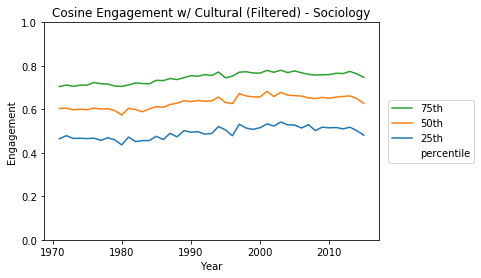

In [97]:
ax = sns.lineplot(x="year_transform", y="culture_score", data=df_sociology_culture, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Cultural (Filtered) - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [94]:
df_avg_management_culture = df_management_culture_nooutlier[['culture_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management_culture = df_avg_management_culture.reset_index()
df_avg_management_culture['percentile'] = '50th'


df_25_management_culture = df_management_culture_nooutlier[['culture_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_management_culture = df_25_management_culture.reset_index()

df_75_management_culture = df_management_culture_nooutlier[['culture_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management_culture = df_75_management_culture.reset_index()

df_25_management_culture['percentile'] = '25th'

df_75_management_culture['percentile'] = '75th'

df_management_culture = pd.concat([df_25_management_culture, df_avg_management_culture, df_75_management_culture])

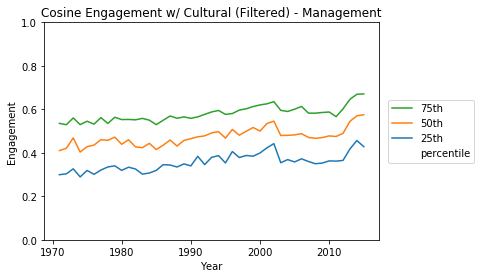

In [95]:
ax = sns.lineplot(x="year_transform", y="culture_score", data=df_management_culture, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Cultural (Filtered) - Management')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_management_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [100]:
df_avg_sociology_demographic = df_sociology_demographic_nooutlier[['demographic_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology_demographic = df_avg_sociology_demographic.reset_index()
df_avg_sociology_demographic['percentile'] = '50th'


df_25_sociology_demographic = df_sociology_demographic_nooutlier[['demographic_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology_demographic = df_25_sociology_demographic.reset_index()

df_75_sociology_demographic = df_sociology_demographic_nooutlier[['demographic_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology_demographic = df_75_sociology_demographic.reset_index()

df_25_sociology_demographic['percentile'] = '25th'

df_75_sociology_demographic['percentile'] = '75th'

df_sociology_demographic = pd.concat([df_25_sociology_demographic, df_avg_sociology_demographic, df_75_sociology_demographic])

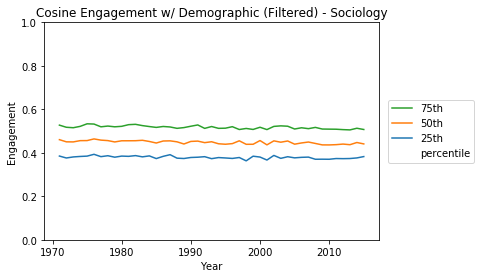

In [101]:
ax = sns.lineplot(x="year_transform", y="demographic_score", data=df_sociology_demographic, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Demographic (Filtered) - Sociology')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [105]:
df_avg_management_demographic = df_management_demographic_nooutlier[['demographic_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management_demographic = df_avg_management_demographic.reset_index()
df_avg_management_demographic['percentile'] = '50th'


df_25_management_demographic = df_management_demographic_nooutlier[['demographic_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_management_demographic = df_25_management_demographic.reset_index()

df_75_management_demographic = df_management_demographic_nooutlier[['demographic_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management_demographic = df_75_management_demographic.reset_index()

df_25_management_demographic['percentile'] = '25th'

df_75_management_demographic['percentile'] = '75th'

df_management_demographic = pd.concat([df_25_management_demographic, df_avg_management_demographic, df_75_management_demographic])

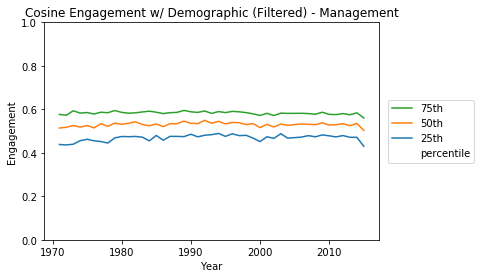

In [106]:
ax = sns.lineplot(x="year_transform", y="demographic_score", data=df_management_demographic, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Demographic (Filtered) - Management')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [102]:
df_avg_sociology_relational = df_sociology_relational_nooutlier[['relational_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology_relational = df_avg_sociology_relational.reset_index()
df_avg_sociology_relational['percentile'] = '50th'


df_25_sociology_relational = df_sociology_relational_nooutlier[['relational_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology_relational = df_25_sociology_relational.reset_index()

df_75_sociology_relational = df_sociology_relational_nooutlier[['relational_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology_relational = df_75_sociology_relational.reset_index()

df_25_sociology_relational['percentile'] = '25th'

df_75_sociology_relational['percentile'] = '75th'

df_sociology_relational = pd.concat([df_25_sociology_relational, df_avg_sociology_relational, df_75_sociology_relational])

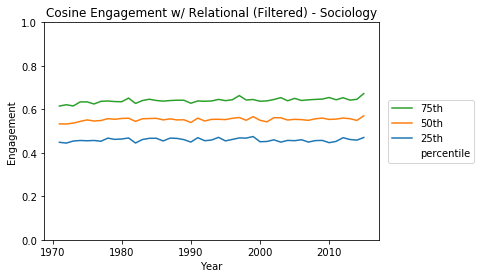

In [103]:
ax = sns.lineplot(x="year_transform", y="relational_score", data=df_sociology_relational, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Relational (Filtered) - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [107]:
df_avg_management_relational = df_management_relational_nooutlier[['relational_score','year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management_relational = df_avg_management_relational.reset_index()
df_avg_management_relational['percentile'] = '50th'


df_25_management_relational = df_management_relational_nooutlier[['relational_score',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_management_relational = df_25_management_relational.reset_index()

df_75_management_relational = df_management_relational_nooutlier[['relational_score','year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management_relational = df_75_management_relational.reset_index()

df_25_management_relational['percentile'] = '25th'

df_75_management_relational['percentile'] = '75th'

df_management_relational = pd.concat([df_25_management_relational, df_avg_management_relational, df_75_management_relational])

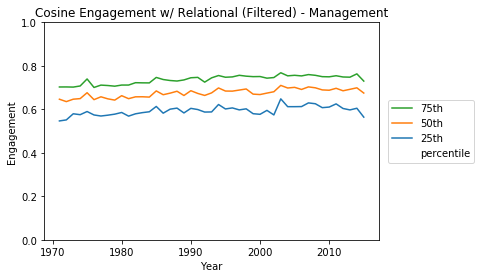

In [108]:
ax = sns.lineplot(x="year_transform", y="relational_score", data=df_management_relational, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0, 1))
ax.set_title('Cosine Engagement w/ Relational (Filtered) - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_sociology_filtered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

# Counting Tokens

In [109]:
import gc # For speeding up loading pickle files ('gc' = 'garbage collector')
import _pickle as cPickle # Optimized version of pickle


def quickpickle_load(picklepath):
    '''Very time-efficient way to load pickle-formatted objects into Python.
    Uses C-based pickle (cPickle) and gc workarounds to facilitate speed. 
    Input: Filepath to pickled (*.pkl) object.
    Output: Python object (probably a list of sentences or something similar).'''

    with open(picklepath, 'rb') as loadfile:
        
        gc.disable() # disable garbage collector
        outputvar = cPickle.load(loadfile) # Load from picklepath into outputvar
        gc.enable() # enable garbage collector again
    
    return outputvar

In [110]:
whole_text = quickpickle_load("../../../models_storage/word_embeddings_data/cleaned_text_flat_2020_sept5.pkl")

In [111]:
sum([len(x) for x in whole_text])

357981836